In [1]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torch
import matplotlib.pyplot as plt
from model import VIT

In [ ]:
from PIL import Image
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

In [ ]:
dataset = ImageFolder(root="./data/food101/test/test", transform=transform)

classes = dataset.classes
custom_config = {
    "img_size": 224,
    "patch_size": 16,
    "in_chans": 3,
    "n_classes": len(classes),
    "embed_dim": 384,
    "depth": 8,
    "n_heads": 6,
    "qkv_bias": True,
    "mlp_ratio": 4.0,
}

DEVICE= "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
model = VIT(**custom_config).to(DEVICE)
checkpoint = torch.load("./models/model_food101_24.pth")
model.load_state_dict(checkpoint['model_weights'])

<All keys matched successfully>

In [52]:
from PIL import Image

# dataset = ImageFolder(root="./data/food101/test/test", transform=transform)
# img, label = dataset[1]
# img = img.unsqueeze(0).to(DEVICE)
img = Image.open(r"data\Food101\test\test\cannoli\1509308.jpg")
img = transform(img).unsqueeze(0).to(DEVICE)

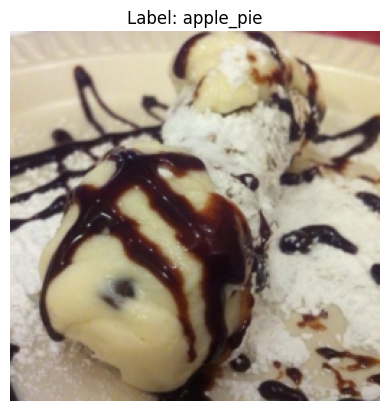

In [53]:
plt.imshow(img.squeeze(0).permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
plt.axis('off')
plt.title(f"Label: {classes[label]}")
plt.show()

In [54]:
model.eval()
with torch.no_grad():
    output = model(img)
_, predicted = torch.max(output, 1)
predicted_label = classes[predicted.item()]
print(f"Predicted label: {predicted_label}")

Predicted label: cannoli
